In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
drive.mount('/content/drive', force_remount = True)
ufo_data='/content/drive/My Drive/scrubbed.csv'
%matplotlib inline

Mounted at /content/drive


In [ ]:
df=pd.read_csv(ufo_data)

<ipython-input-8-9ee72a55ef5b>:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(ufo_data)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [ ]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [ ]:
df.datetime = df.datetime.apply(lambda x: x[:-5])

In [ ]:
df.datetime = pd.to_datetime(df.datetime)

In [ ]:
df1=df[['datetime','state','country']]

In [ ]:
df1.head()

,datetime,state,country
0,1949-10-10,tx,us
1,1949-10-10,tx,NaN
2,1955-10-10,NaN,gb
3,1956-10-10,tx,us
4,1960-10-10,hi,us


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  80332 non-null  datetime64[ns]
 1   state     74535 non-null  object        
 2   country   70662 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.8+ MB


In [ ]:
df1.country.unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [ ]:
df1.state.unique()

array(['tx', nan, 'hi', 'tn', 'ct', 'al', 'fl', 'ca', 'nc', 'ny', 'ky',
       'mi', 'ma', 'ks', 'sc', 'wa', 'ab', 'co', 'nh', 'wi', 'me', 'ga',
       'pa', 'il', 'ar', 'on', 'mo', 'oh', 'in', 'az', 'mn', 'nv', 'nf',
       'ne', 'or', 'bc', 'ia', 'va', 'id', 'nm', 'nj', 'mb', 'wv', 'ok',
       'ri', 'nb', 'vt', 'la', 'pr', 'ak', 'ms', 'ut', 'md', 'mt', 'sk',
       'wy', 'sd', 'pq', 'ns', 'qc', 'de', 'nd', 'dc', 'nt', 'sa', 'yt',
       'yk', 'pe'], dtype=object)

In [ ]:
states_li = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
states_li = [e.lower() for e in states_li]

In [ ]:
df1=df1[(df1.country=='us') & (df1.state.isin(states_li)) ]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65089 entries, 0 to 80331
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  65089 non-null  datetime64[ns]
 1   state     65089 non-null  object        
 2   country   65089 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.0+ MB


In [ ]:
df1[df1.country.isna()]

,datetime,state,country


In [ ]:
df1['year'] = df1.datetime.dt.year
df1=df1[['year','state']]

In [ ]:
df1['count']=1

In [ ]:
def state_to_region(state_code):
    regions = {
        'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
        'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
        'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
        'West': ['AZ', 'CO', 'ID', 'MT', 'NV','NM','UT','WY','AK','CA','HI','OR','WA']
    }
    rev_region = {}
    for k,v in regions.items():
      for s in v:
        rev_region[s] = k

    return rev_region[state_code.upper()] 

In [ ]:
df1['region'] = df1.state.apply(state_to_region)

In [ ]:
df1.head()

,year,state,count,region
0,1949,tx,1,South
3,1956,tx,1,South
4,1960,hi,1,West
5,1961,tn,1,South
7,1965,ct,1,Northeast


In [ ]:
df_grouped = df1[['year','region','count']].groupby(by=['year','region']).agg('count')

In [ ]:
df_grouped.head()

count
year region        
1910 Midwest      1
     South        1
1920 Midwest      1
1925 Midwest      1
1929 West         1

In [ ]:
df_grouped.reset_index(inplace=True)

In [ ]:
df_grouped.head()

,year,region,count
0,1910,Midwest,1
1,1910,South,1
2,1920,Midwest,1
3,1925,Midwest,1
4,1929,West,1


In [ ]:
df_grouped.region.unique()

array(['Midwest', 'South', 'West', 'Northeast'], dtype=object)

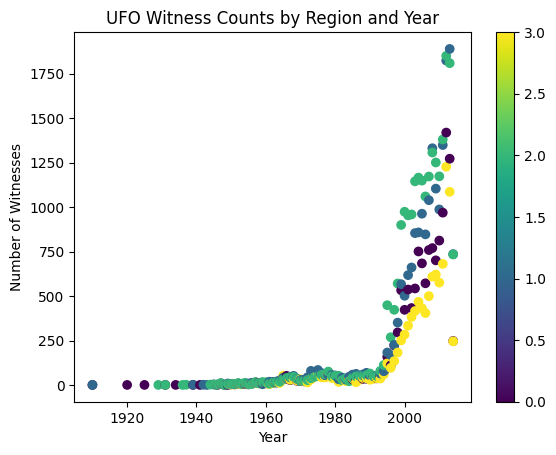

In [ ]:

region2num = {'Midwest':0, 'South':1, 'West':2, 'Northeast':3}
df2 = df_grouped
df2['Region Code'] = df2['region'].apply(lambda x: region2num[x])
 
# Create scatter plot with color-coded categorical variable
plt.scatter(df2['year'], df2['count'], c=df2['Region Code'])
plt.xlabel('Year')
plt.ylabel('Number of Witnesses')
plt.title('UFO Witness Counts by Region and Year')
plt.colorbar()
plt.show()

In [ ]:
df2.head()

,year,region,count,Region Code
0,1910,Midwest,1,0
1,1910,South,1,1
2,1920,Midwest,1,0
3,1925,Midwest,1,0
4,1929,West,1,2


In [ ]:
df2[['year','region','count']].head()

,year,region,count
0,1910,Midwest,1
1,1910,South,1
2,1920,Midwest,1
3,1925,Midwest,1
4,1929,West,1


In [ ]:
df2[df2.year==df2.year.max()]

,year,region,count,Region Code
288,2014,Midwest,248,0
289,2014,Northeast,246,3
290,2014,South,736,1
291,2014,West,734,2


<Axes: xlabel='year'>

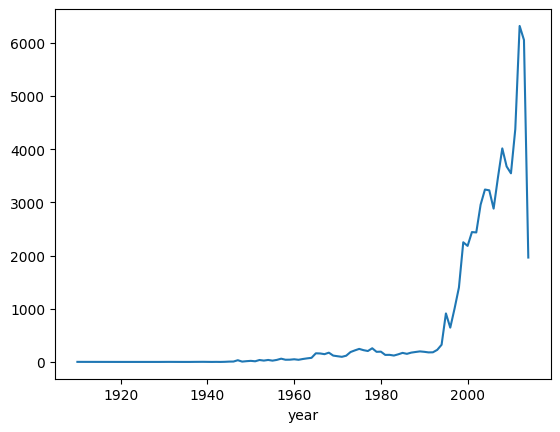

In [ ]:
df2.groupby('year').agg('sum')['count'].plot()

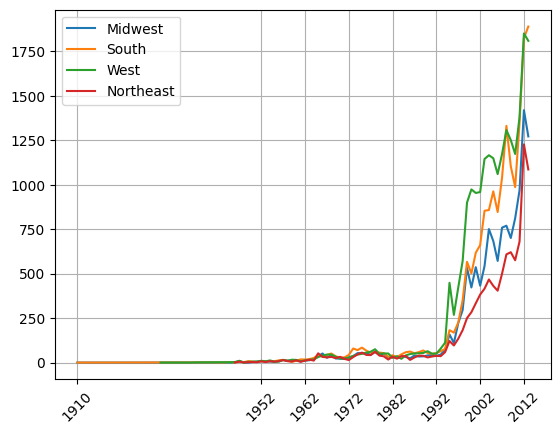

In [ ]:
for reg in ['Midwest', 'South', 'West', 'Northeast']:
  tmp = df2[(df2.region==reg) & (df2.year!=2014) ] # remove 2014 for continious look 
  plt.plot(tmp['year'], tmp['count'], label = reg)
plt.legend()
plt.xticks(df.year[1:-1:40],rotation=45)
plt.grid()
plt.show()

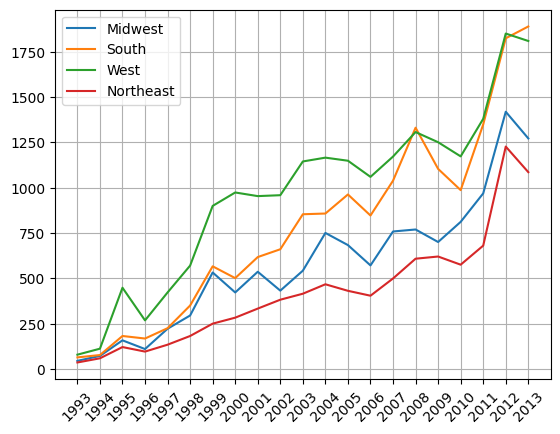

In [ ]:
for reg in ['Midwest', 'South', 'West', 'Northeast']:
  tmp = df2[(df2.region==reg) & (df2.year>1992) & (df2.year!=2014) ]
  plt.plot(tmp['year'], tmp['count'], label = reg)
plt.legend()
plt.xticks(range(1993,2014),rotation=45)
plt.grid()
plt.show()

Text(0.05, 0.5, 'Number of Witness')

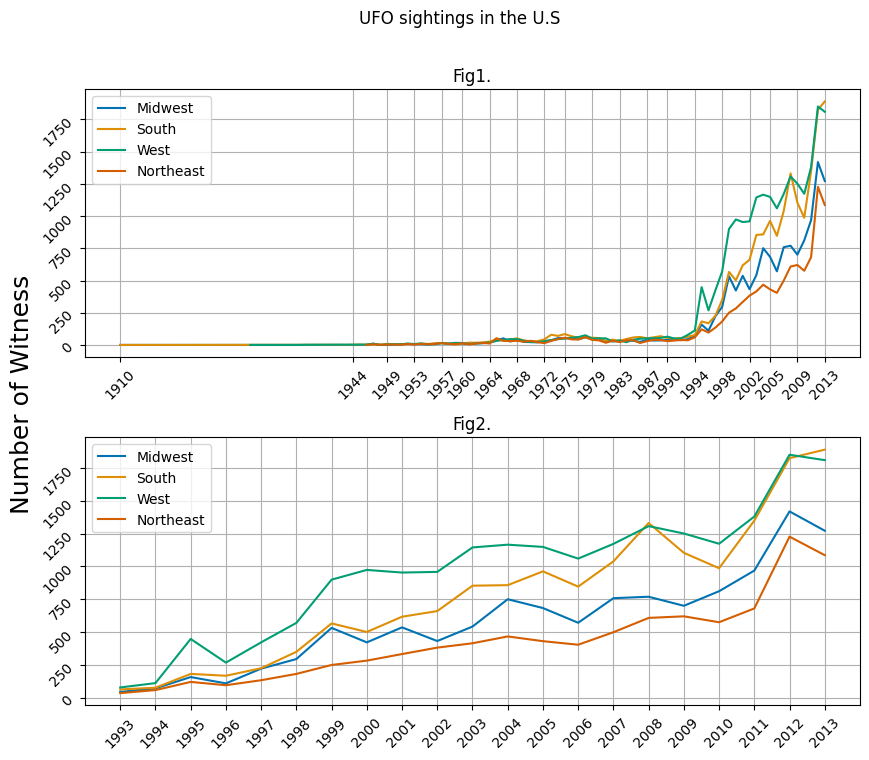

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8 ))#,constrained_layout=True)


# Plot the first graph on the first subplot
for reg in ['Midwest', 'South', 'West', 'Northeast']:
  tmp = df2[(df2.region==reg) & (df2.year!=2014) ]
  ax1.plot(tmp['year'], tmp['count'], label = reg )
  ax1.legend(loc='best') 

ax1.set_xticks(df2.year[::15]) 
ax1.tick_params(labelrotation=45)
#ax1.set_xticks(df.year, rotation=45)
ax1.grid()
ax1.set_title('Fig1.')
plt.subplots_adjust(hspace=0.3)
# Plot the second graph on the second subplot
for reg in ['Midwest', 'South', 'West', 'Northeast']:
  tmp = df[(df2.region==reg) & (df2.year>1992) & (df2.year!=2014) ]
  ax2.plot(tmp['year'], tmp['count'], label = reg )
  ax2.legend(loc='best') 
ax2.set_xticks(range(1993,2014))
ax2.tick_params(labelrotation=45)
ax2.grid()
ax2.set_title('Fig2.')
# Set the overall title of the figure
fig.suptitle('UFO sightings in the U.S')
# Set common y-axis label
fig.text(0.05, 0.5, 'Number of Witness', va='center', rotation='vertical', fontsize=18)



Text(0.05, 0.5, 'Number of UFO')

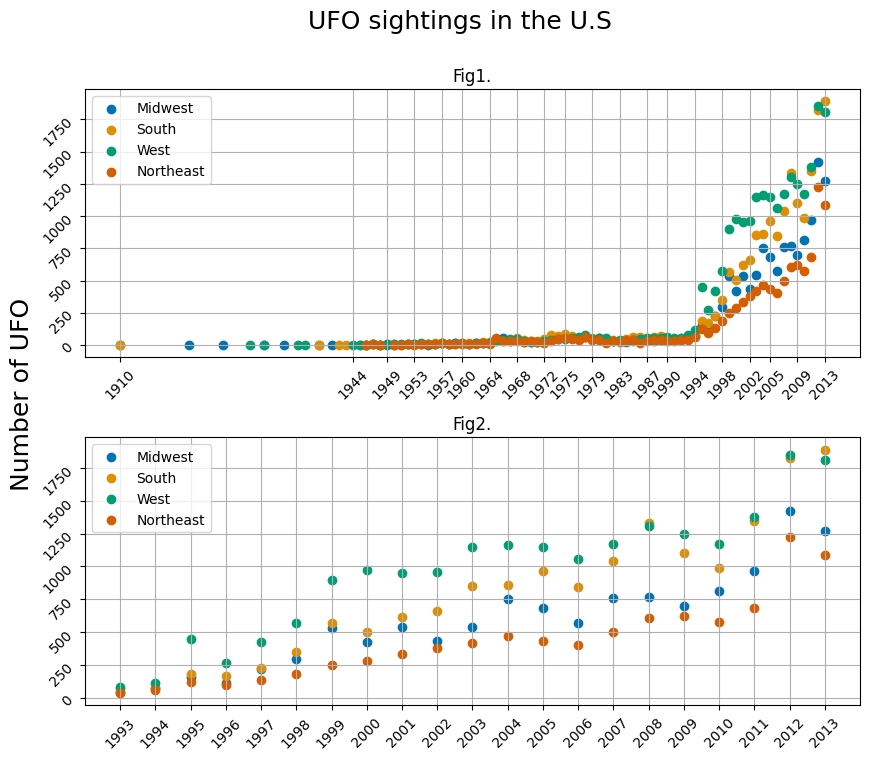

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8 ))#,constrained_layout=True)

# Plot the first graph on the first subplot
for reg in ['Midwest', 'South', 'West', 'Northeast']:
    tmp = df2[(df2.region==reg) & (df2.year!=2014) ]
    ax1.scatter(tmp['year'], tmp['count'], label=reg, marker='o')
    ax1.legend(loc='best')

ax1.set_xticks(df2.year[::15]) 
ax1.tick_params(labelrotation=45)
ax1.grid()
ax1.set_title('Fig1.')
plt.subplots_adjust(hspace=0.3)

# Plot the second graph on the second subplot
for reg in ['Midwest', 'South', 'West', 'Northeast']:
    tmp = df2[(df2.region==reg) & (df2.year>1992) & (df2.year!=2014) ]
    ax2.scatter(tmp['year'], tmp['count'], label=reg, marker='o')
    ax2.legend(loc='best')

ax2.set_xticks(range(1993,2014))
ax2.tick_params(labelrotation=45)
ax2.grid()
ax2.set_title('Fig2.')

# Set the overall title of the figure
fig.suptitle('UFO sightings in the U.S', fontsize=18)

# Set common y-axis label
fig.text(0.05, 0.5, 'Number of UFO', va='center', rotation='vertical', fontsize=18)


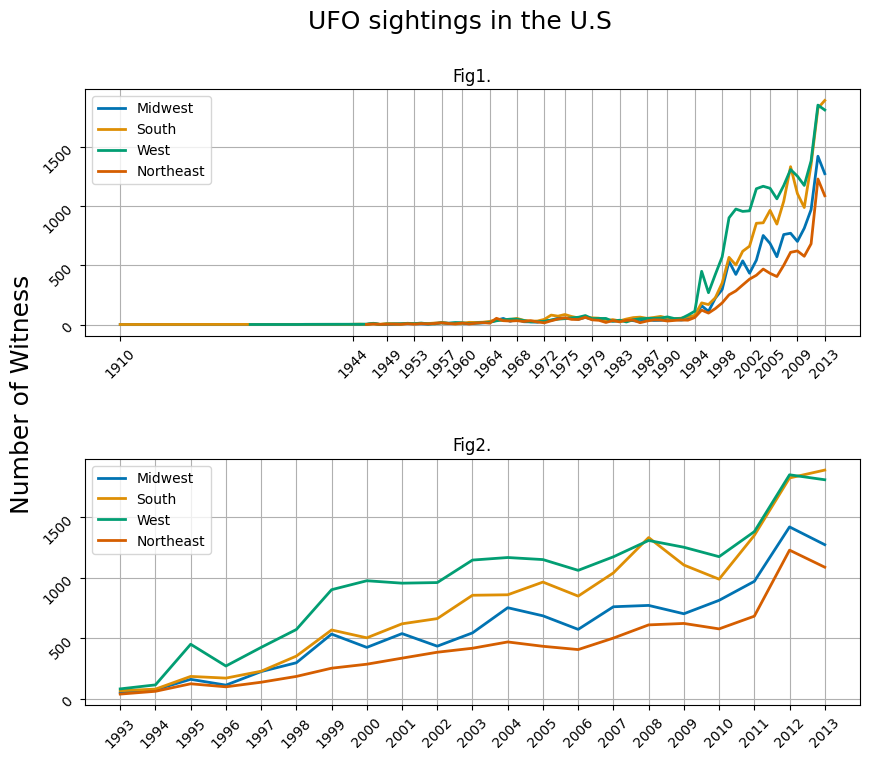

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

# Plot the first graph on the first subplot
for i, reg in enumerate(['Midwest', 'South', 'West', 'Northeast']):
  tmp = df[(df2.region==reg) & (df2.year!=2014) ]
  ax1.plot(tmp['year'], tmp['count'], label = reg, color=sns.color_palette()[i], linewidth=2)
  ax1.legend(loc='best') 

ax1.set_xticks(df2.year[::15]) 
ax1.tick_params(labelrotation=45)
ax1.grid()
ax1.set_title('Fig1.')

# Plot the second graph on the second subplot
for i, reg in enumerate(['Midwest', 'South', 'West', 'Northeast']):
  tmp = df[(df2.region==reg) & (df2.year>1992) & (df2.year!=2014) ]
  ax2.plot(tmp['year'], tmp['count'], label = reg, color=sns.color_palette()[i], linewidth=2)
  ax2.legend(loc='best') 

ax2.set_xticks(range(1993,2014))
ax2.tick_params(labelrotation=45)
ax2.grid()
ax2.set_title('Fig2.')

# Set the overall title of the figure
fig.suptitle('UFO sightings in the U.S', fontsize=18)

# Increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Set common y-axis label
fig.text(0.05, 0.5, 'Number of Witness', va='center', rotation='vertical', fontsize=18)

# Show the plot
plt.show()

